In [49]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as np
%matplotlib inline
import seaborn as sns
import pandas as pd

In [50]:
#dataset
df = pd.read_csv('city_day.csv')

In [51]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [53]:
df.nunique()

City             26
Date           2009
PM2.5         11716
PM10          12571
NO             5776
NO2            7404
NOx            8156
NH3            5922
CO             1779
SO2            4761
O3             7699
Benzene        1873
Toluene        3608
Xylene         1561
AQI             829
AQI_Bucket        6
dtype: int64

In [54]:
# Columns  to keep
required_columns = ['Date','PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']

# Drop other columns
newdf = df[required_columns]
newdf.head()


,Date,PM2.5,PM10,NO2,SO2,CO,O3,AQI
0,2015-01-01,NaN,NaN,18.22,27.64,0.92,133.36,NaN
1,2015-01-02,NaN,NaN,15.69,24.55,0.97,34.06,NaN
2,2015-01-03,NaN,NaN,19.30,29.07,17.40,30.70,NaN
3,2015-01-04,NaN,NaN,18.48,18.59,1.70,36.08,NaN
4,2015-01-05,NaN,NaN,21.42,39.33,22.10,39.31,NaN


In [55]:
newdf.nunique()

Date      2009
PM2.5    11716
PM10     12571
NO2       7404
SO2       4761
CO        1779
O3        7699
AQI        829
dtype: int64

In [56]:
# Convert Date column to datetime format using .loc
newdf['Date'] = pd.to_datetime(newdf['Date'])
# Sort by Date
newdf = newdf.sort_values(by='Date')


C:\Users\nm_ma\AppData\Local\Temp\ipykernel_14572\298728955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Date'] = pd.to_datetime(newdf['Date'])


In [57]:
# Count the number of NaN values in each column
nan_count = newdf.isna().sum()
print(nan_count)



Date         0
PM2.5     4598
PM10     11140
NO2       3585
SO2       3854
CO        2059
O3        4022
AQI       4681
dtype: int64


In [58]:
newdf = newdf.fillna(method='bfill')
newdf.isna().sum()
newdf.head()


C:\Users\nm_ma\AppData\Local\Temp\ipykernel_14572\1076452550.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  newdf = newdf.fillna(method='bfill')


,Date,PM2.5,PM10,NO2,SO2,CO,O3,AQI
0,2015-01-01,313.22,607.98,18.22,27.64,0.92,133.36,472.0
7834,2015-01-01,313.22,607.98,15.39,9.20,1.17,11.35,472.0
10229,2015-01-01,313.22,607.98,36.39,9.25,15.20,41.68,472.0
19846,2015-01-01,186.18,269.55,13.46,169.57,12.15,25.92,454.0
21855,2015-01-01,186.18,269.55,17.33,3.54,0.00,10.73,454.0


In [59]:
# remove spaces on the column
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

In [60]:
len(newdf)

29531

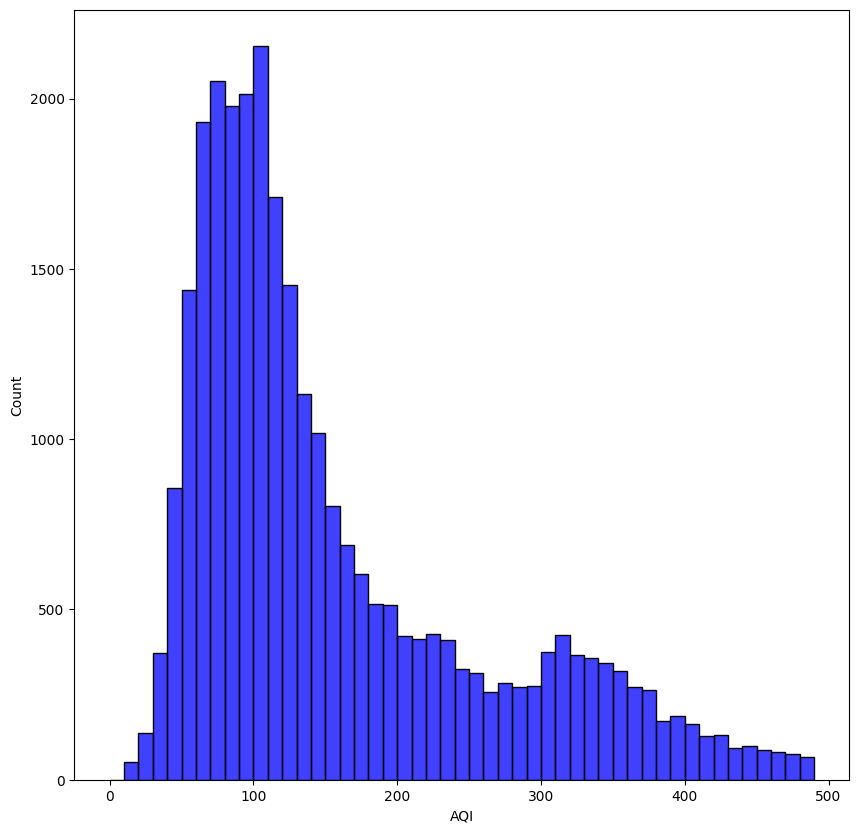

In [61]:
plt.figure(figsize=(10,10))
sns.histplot(newdf['AQI'], bins=[i for i in range(0,500,10)], kde=False, color='blue')
plt.show()


In [62]:
#import libraries for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.layers import BatchNormalization


In [63]:
#Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(newdf.drop('Date', axis=1))
scaled_data.shape

(29531, 7)

In [64]:
import numpy as np

# Function to prepare the dataset for LSTM
def create_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])  # Take the past 'time_step' days
        Y.append(data[i + time_step, -1])  # The next day's AQI is the target
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

# Use the past 7 days to predict the next day's AQI
time_step = 7
X, Y = create_dataset(scaled_data, time_step)

# Check shapes of X and Y before reshaping
print(f"Shape of X: {X.shape}")  # Should be (num_samples, time_steps, num_features)
print(f"Shape of Y: {Y.shape}")  # Should be (num_samples,)

Shape of X: (29524, 7, 7)
Shape of Y: (29524,)


In [65]:

# Reshape input to be [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

In [66]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Train X shape:", X_train.shape)
print("Train Y shape:", Y_train.shape)
print("Test X shape:", X_test.shape)
print("Test Y shape:", Y_test.shape)


Train X shape: (23619, 7, 7)
Train Y shape: (23619,)
Test X shape: (5905, 7, 7)
Test Y shape: (5905,)


In [67]:
# Create the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=128, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(1))  # Output layer for AQI prediction
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


C:\Users\nm_ma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 7, 128)         │        69,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 7, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,313 (520.75 KB)

 Trainable params: 132,929 (519.25 KB)

 Non-trainable params: 384 (1.50 KB)

In [69]:
# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model.keras', save_best_only=True)


In [70]:
# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0126 - val_loss: 0.0043
Epoch 2/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 3/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 4/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 5/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 6/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 8/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 9/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 10/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 11/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 12/100
591/591 ━━━━━━

In [78]:
# Generate predictions for training and test datasets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate model performance on training data
train_mse = mean_squared_error(Y_train, train_predict)
train_rmse = np.sqrt(train_mse)
print(f"Training RMSE: {train_rmse}")

# Evaluate model performance on test data
test_mse = mean_squared_error(Y_test, test_predict)
test_rmse = np.sqrt(test_mse)
print(f"Testing RMSE: {test_rmse}")

739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training RMSE: 0.06046558448006652
Testing RMSE: 0.06475955557242202


In [82]:
# Create an empty array of the same shape as scaled_data
temp_test_predict = np.zeros((test_predict.shape[0], scaled_data.shape[1]))

# Fill only the AQI column (assuming it's the last column, adjust if needed)
temp_test_predict[:, -1] = test_predict[:, 0]

# Inverse transform using the scaler
test_predict_original = scaler.inverse_transform(temp_test_predict)

# Extract only the AQI column after reverse scaling
test_predict_original = test_predict_original[:, -1]

# Repeat the same for Y_test to reverse scale it
temp_Y_test = np.zeros((Y_test.shape[0], scaled_data.shape[1]))
temp_Y_test[:, -1] = Y_test

# Inverse transform the actual test values
Y_test_original = scaler.inverse_transform(temp_Y_test)
Y_test_original = Y_test_original[:, -1]


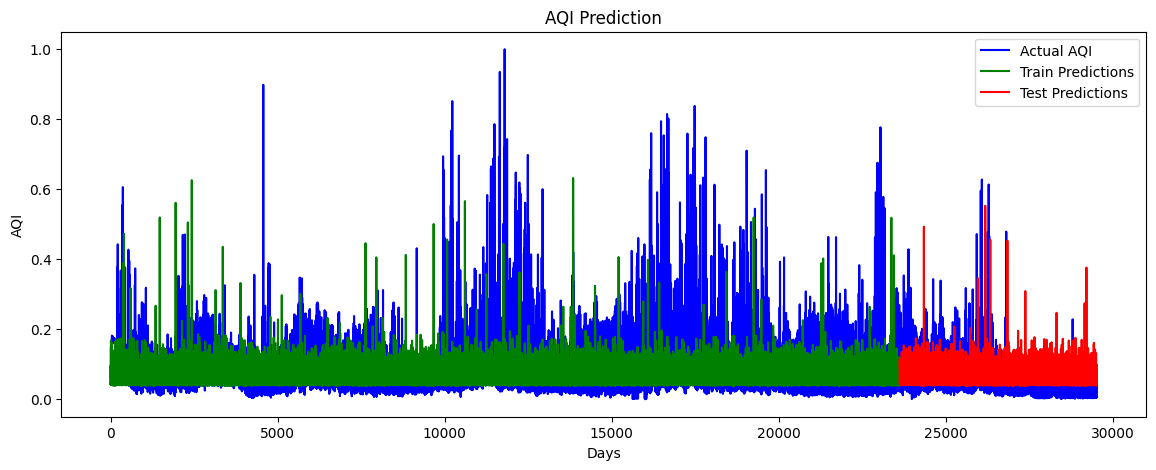

In [83]:


# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(range(len(Y)), Y, label='Actual AQI', color='blue')
plt.plot(range(len(train_predict)), train_predict, label='Train Predictions', color='green')
plt.plot(range(len(train_predict), len(train_predict) + len(test_predict)), test_predict, label='Test Predictions', color='red')
plt.title('AQI Prediction')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.legend()
plt.show()


In [84]:
import tensorflow as tf
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('best_model.keras')
test_loss = best_model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039
Test Loss: 0.004193800967186689


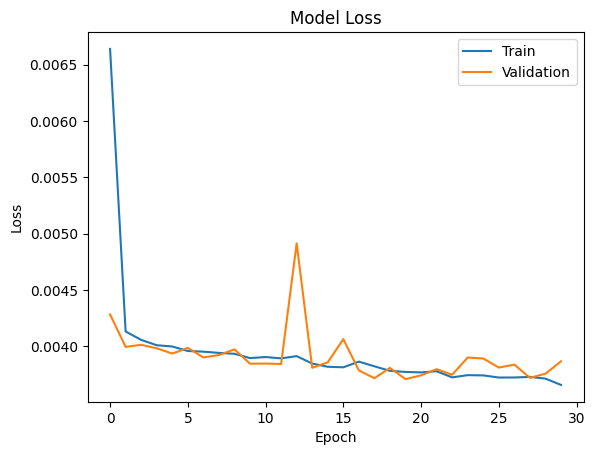

In [85]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Predict temperatures using the trained model
predictions = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Mean Absolute Error (MAE): 0.03973004219458159
Mean Squared Error (MSE): 0.004193800037937616
Root Mean Squared Error (RMSE): 0.06475955557242202


In [87]:
# y_true values
test_y_copies = np.repeat(Y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

# predicted values
prediction = best_model.predict(X_test)
prediction_copies = np.repeat(prediction, X_test.shape[-1], axis=-1)  # Fix the shape issue
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


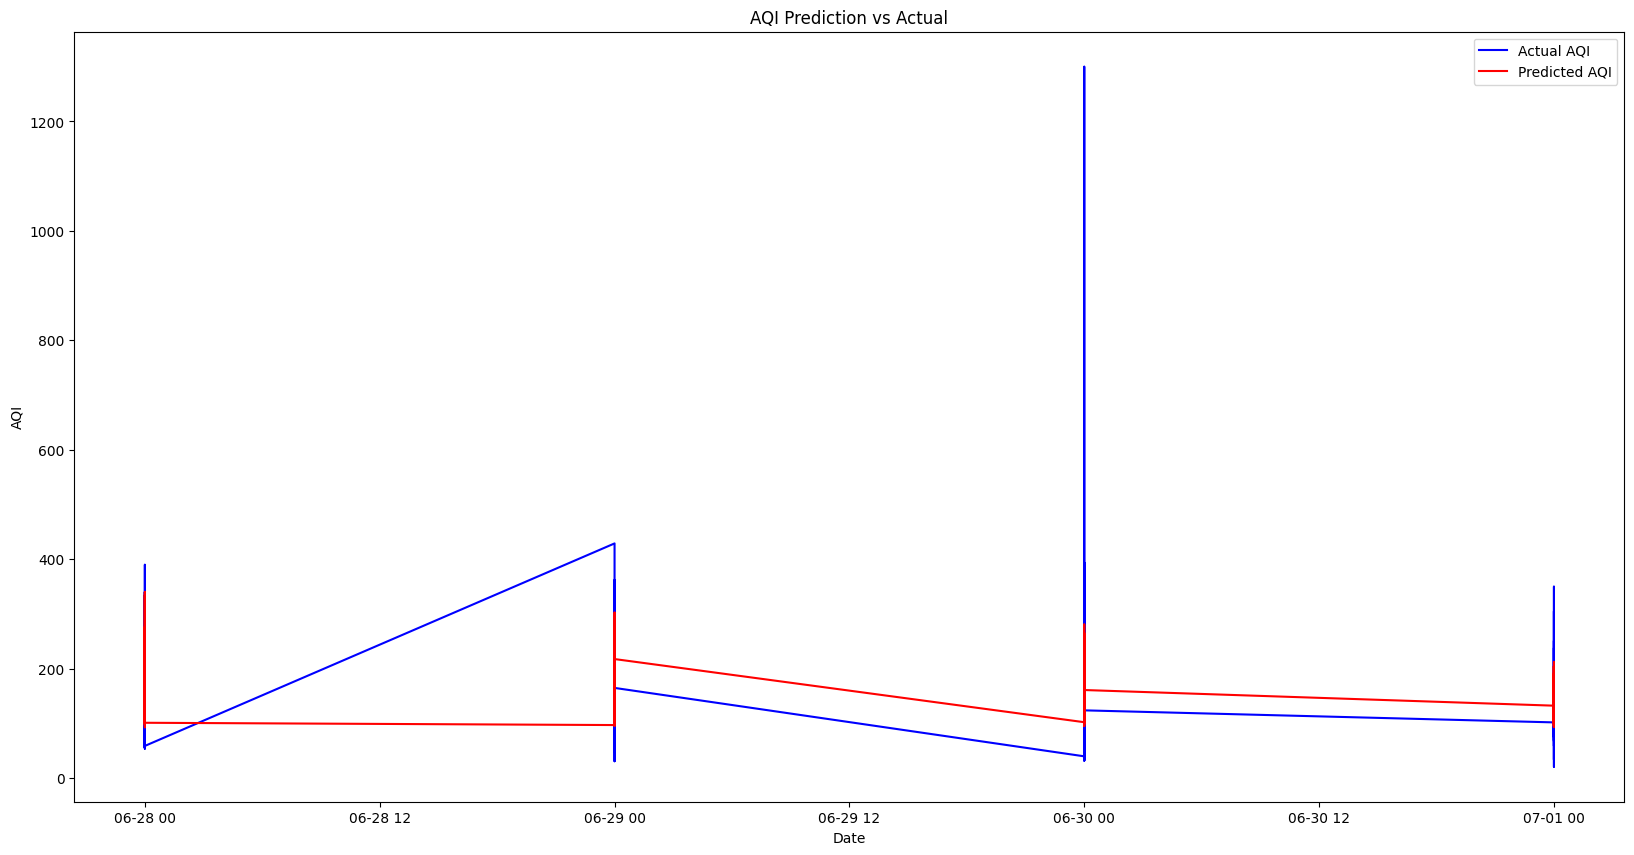

In [88]:
# Plotting predicted and actual AQI values
plt.figure(figsize=(20, 10))

# Plot the actual AQI values for the last 100 days
plt.plot(newdf['Date'][-100:], true_temp[-100:], label='Actual AQI', color='blue')

# Plot the predicted AQI values for the last 100 days
plt.plot(newdf['Date'][-100:], predicted_temp[-100:], label='Predicted AQI', color='red')

# Adding title and labels
plt.title('AQI Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()

# Display the plot
plt.show()